In [206]:
import numpy as np
import pandas
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Input Cells

In [207]:
demography = pd.read_excel('data/all.xlsx')

In [208]:
demography.drop_duplicates('ID', inplace=True)

In [209]:
demography = demography.drop('ID', axis=1)

# Weekly income + Quality

In [210]:
demography.groupby('Favourite category').mean()

,Age,Weekly income,Preferred quality
Favourite category,,,
Asian cuisine,53.474820,72.848921,0.425827
Czech cuisine,53.759740,56.675325,0.394935
Italian cuisine,50.669065,83.726619,0.432302


In [211]:
demography.groupby('Favourite category').median()

,Age,Weekly income,Preferred quality
Favourite category,,,
Asian cuisine,53.0,44.0,0.380
Czech cuisine,54.0,38.0,0.345
Italian cuisine,52.0,45.0,0.370


In [212]:
cz = demography[demography['Favourite category'] == 'Czech cuisine']['Weekly income']
asian = demography[demography['Favourite category'] == 'Asian cuisine']['Weekly income']
it = demography[demography['Favourite category'] == 'Italian cuisine']['Weekly income']

cz_q = demography[demography['Favourite category'] == 'Czech cuisine']['Preferred quality']
asian_q = demography[demography['Favourite category'] == 'Asian cuisine']['Preferred quality']
it_q = demography[demography['Favourite category'] == 'Italian cuisine']['Preferred quality']

Text(0.5, 1.0, 'Italian')

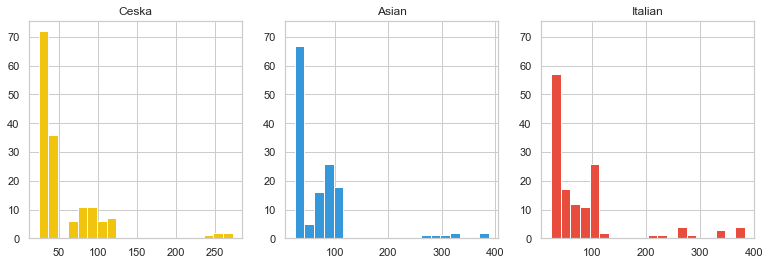

In [213]:
plt.figure(figsize=(13,4))

ax = plt.subplot(1,3,1)
plt.hist(cz, label='Ceska', color='#f1c40f', bins=20)
plt.title('Ceska')

plt.subplot(1,3, 2, sharey=ax)
plt.hist(asian, label='Asian', color='#3498db', bins=20)
plt.title('Asian')

plt.subplot(1,3, 3, sharey=ax)
plt.hist(it, label='Italian', color='#e74c3c', bins=20)
plt.title('Italian')


Text(0.5, 1.0, 'Italian')

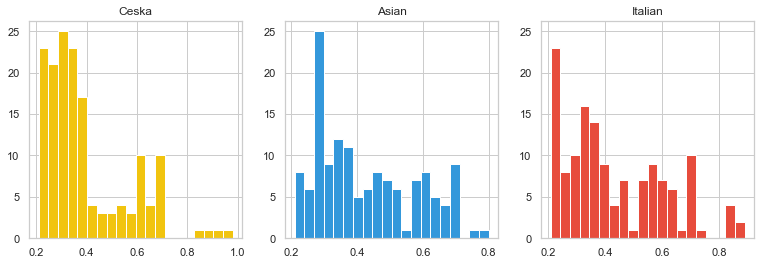

In [214]:
plt.figure(figsize=(13,4))
ax = plt.subplot(1,3,1)
plt.hist(cz_q, label='Ceska', color='#f1c40f', bins=20)
plt.title('Ceska')

plt.subplot(1,3, 2, sharey=ax)
plt.hist(asian_q, label='Asian', color='#3498db', bins=20)
plt.title('Asian')

plt.subplot(1,3, 3, sharey=ax)
plt.hist(it_q, label='Italian', color='#e74c3c', bins=20)
plt.title('Italian')

# Favourite category

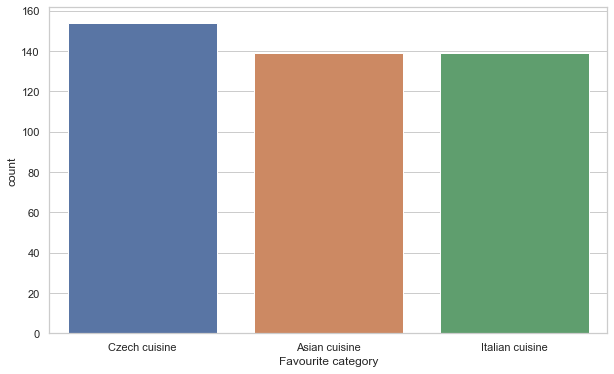

In [215]:
plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
fav = demography.value_counts('Favourite category')
fav = pd.DataFrame(fav).rename(columns={0:'count'})
fav.reset_index(inplace=True)
sns.barplot(x='Favourite category', y='count', data=fav);

# Ad Type

In [216]:
demography.value_counts('Favourite ad type')

Favourite ad type
promo stand big          208
print-on-bus              68
citylight                 59
promo stand small         36
hostess on the street     31
billboard                 27
radio spot                 3
dtype: int64

# Ad Type by Category (Asia, Czechia, Italia)

In [217]:
cat_ad_graph = demography[['Favourite ad type', 'Favourite category']].groupby('Favourite ad type').value_counts()\
    .unstack()

In [218]:
asian = cat_ad_graph['Asian cuisine'].reset_index()

In [219]:
czech = cat_ad_graph['Czech cuisine'].reset_index()

In [220]:
italia =  cat_ad_graph['Italian cuisine'].reset_index()

#================================================

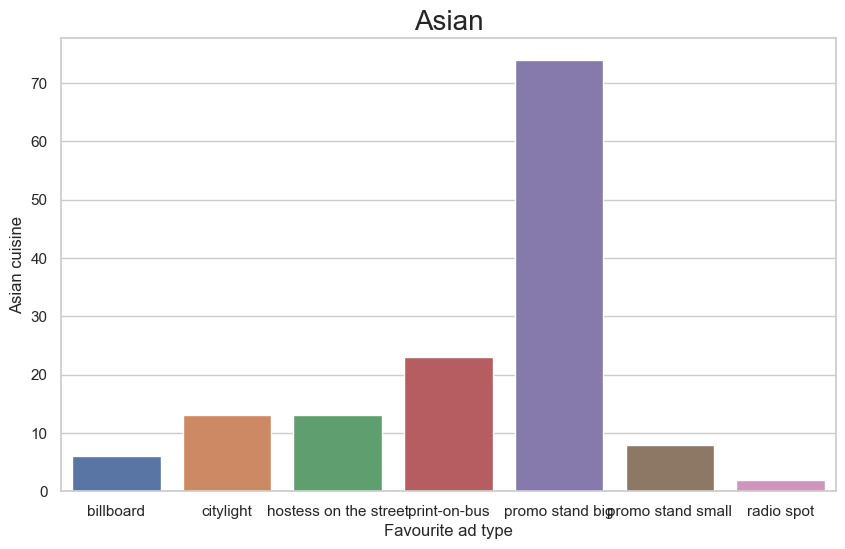

In [221]:
plt.figure(figsize=(10,6), dpi=100)
sns.barplot(data=asian, x='Favourite ad type', y='Asian cuisine')
plt.title('Asian', fontsize=20);

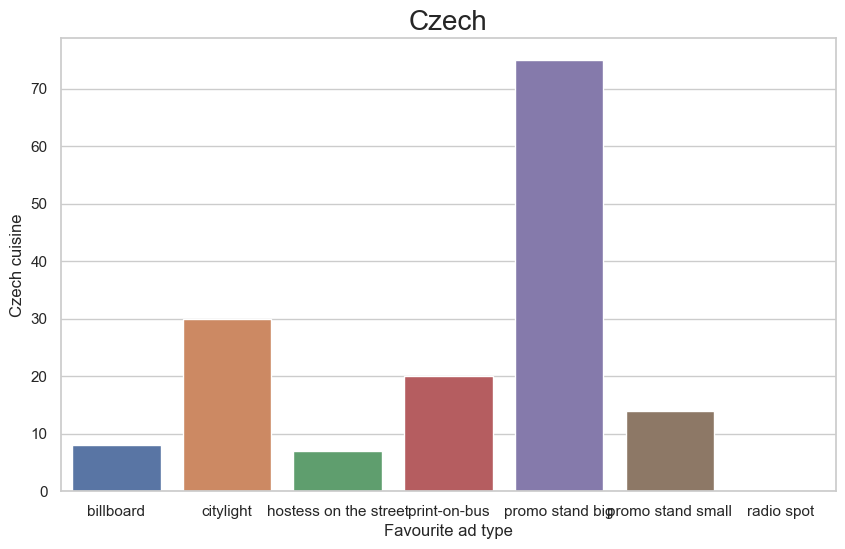

In [222]:
plt.figure(figsize=(10,6), dpi=100)
sns.barplot(data=czech, x='Favourite ad type', y='Czech cuisine')
plt.title('Czech', fontsize=20);

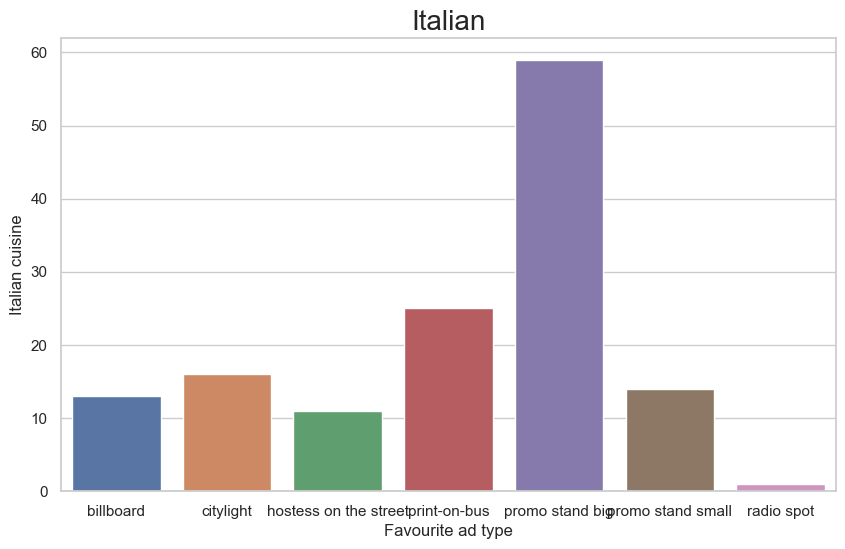

In [223]:
plt.figure(figsize=(10,6), dpi=100)
sns.barplot(data=italia, x='Favourite ad type', y='Italian cuisine')
plt.title('Italian', fontsize=20);

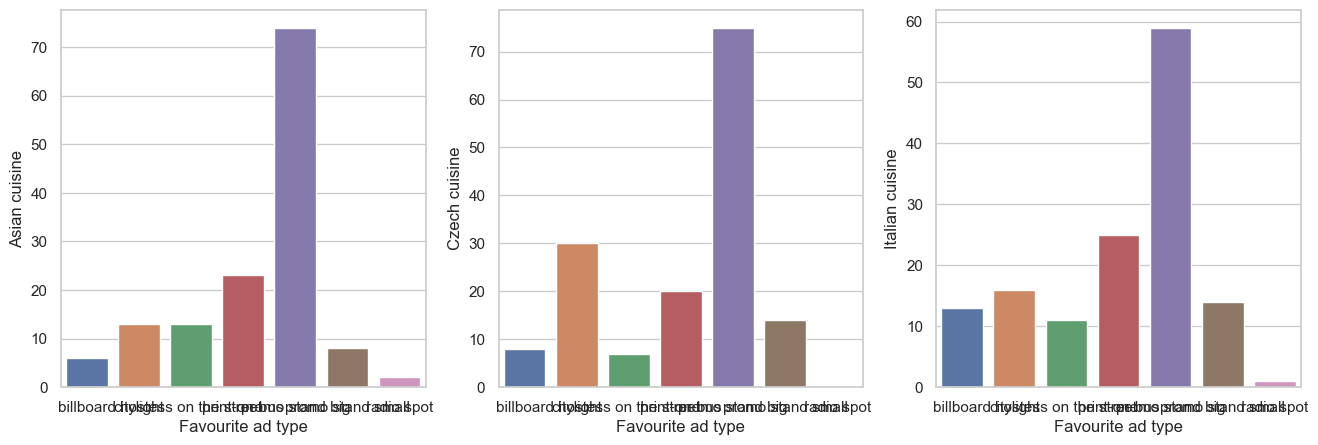

In [224]:
fig, axes = plt.subplots(ncols=3, figsize=(16,5), dpi=100)

sns.barplot(data=asian, x='Favourite ad type', y='Asian cuisine', ax=axes[0])
sns.barplot(data=czech, x='Favourite ad type', y='Czech cuisine', ax=axes[1])
sns.barplot(data=italia, x='Favourite ad type', y='Italian cuisine', ax=axes[2]);

# Более точная выборка дней по кухне и рекламе

In [225]:
cuisine = demography['Favourite category'] == 'Czech cuisine'

In [226]:
ad = demography['Favourite ad type'] == 'promo stand big'

In [227]:
quality= demography['Preferred quality'].between(0.25,0.4)

In [228]:
weekly = demography['Weekly income'].between(30,50)

In [229]:
cz_df = demography[cuisine & ad & quality & weekly]

In [230]:
top_locations = cz_df.describe(include='object')

In [231]:
top_locations.drop(['count', 'unique'], inplace=True)

In [232]:
top_locations.transpose().reset_index().drop([0,1,2,3])

,index,top,freq
4,MON 0-8h,Industrial district,20
5,MON 8-16h,Industrial district,24
6,MON 16-24h,Housing district,31
7,TUE 0-8h,Outskirts,19
8,TUE 8-16h,Industrial district,22
9,TUE 16-24h,Housing district,33
10,WED 0-8h,Industrial district,22
11,WED 8-16h,Industrial district,18
12,WED 16-24h,Housing district,18
13,THU 0-8h,Outskirts,19


In [233]:
metriki = cz_df.describe()

In [234]:
metriki.loc[['mean', '50%']].transpose()

,mean,50%
Age,51.212121,52.00
Weekly income,37.878788,37.00
Preferred quality,0.331818,0.35


# WIP

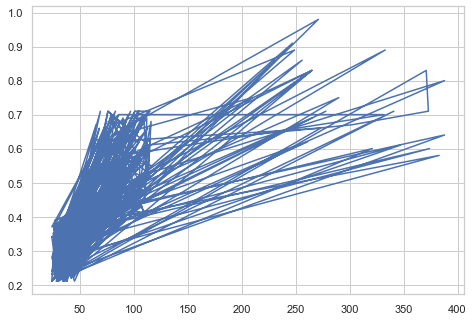

In [235]:
fig = plt.figure()
ax1 = fig.add_axes([0,0,1,1])
ax1.plot(demography['Weekly income'], demography['Preferred quality'])

In [236]:
demography.groupby(['Favourite category']).describe(include=['object'])

Name                 Gender                      \
                   count unique top freq  count unique     top freq   
Favourite category                                                    
Asian cuisine        139    108  KT    3    139      2  Female   72   
Czech cuisine        154    117  JM    3    154      2    Male   84   
Italian cuisine      137    110  SK    3    139      2  Female   85   

                   Favourite ad type         ...             SUN 0-8h       \
                               count unique  ...                  top freq   
Favourite category                           ...                             
Asian cuisine                    139      7  ...      Office district   40   
Czech cuisine                    154      6  ...  Industrial district   58   
Italian cuisine                  139      7  ...            Outskirts   40   

                   SUN 8-16h                                  SUN 16-24h  \
                       count unique                  top freq      count   
Favourite category                                                         
Asian cuisine            139      5            Outskirts   41        139   
Czech cuisine            154      5  Industrial district   55        154   
Italian cuisine          139      5            Outskirts   37        139   

                                                  
                   unique               top freq  
Favourite category                                
Asian cuisine           4  Housing district  101  
Czech cuisine           4  Housing district  131  
Italian cuisine         5  Housing district  104  

[3 rows x 96 columns]